#Importing Libraries*

* tensorflow [1] libraries are used to develop neural network and sklearn [2] libraries are used for data pre-processing and to generate evaluation results.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn import metrics
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the Data set

In [4]:
df = pd.read_csv('Combined_D3.csv') #change the file name to use different data sets
df.sample(5)

,num_memories,num_mult,num_pre_packed_blocks,critical_path_delay,Ratio Percentage
48,0,11,31628,17.8983,1.00
19,2,1,4310,14.3183,1.00
21,0,5,932,22.7853,0.75
53,0,11,31628,18.3616,1.00
13,2,1,4310,14.0662,1.00


#Pre-processing the data

##Data Encoding

In [5]:
encoding_lable = preprocessing.LabelEncoder()
df['Ratio Class']= encoding_lable.fit_transform(df['Ratio Percentage'])
df = df.drop(columns='Ratio Percentage')
df.sample(5)

,num_memories,num_mult,num_pre_packed_blocks,critical_path_delay,Ratio Class
41,2,1,4310,15.2835,8
19,2,1,4310,14.3183,8
82,0,5,923,22.2373,8
50,0,11,31628,17.4507,8
51,0,11,31628,17.2903,8


In [6]:
df = df.dropna()
data = df.to_numpy()

##Splitting the data set into train and test sets

In [7]:
X = data[:,0:4]
y = data[:,4:]
Y = pd.get_dummies(y.ravel()).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

##Normalizing the data

In [8]:
#Scaling the data
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
#Printing shape of train and test vectors
print("X_train: Shape: ",X_train_scaled.shape)
print("Y_train: Shape: ",y_train.shape)
print("X_test:  Shape: ",X_test_scaled.shape)
print("Y_test:  Shape: ",y_test.shape)

X_train: Shape:  (80, 4)
Y_train: Shape:  (80, 9)
X_test:  Shape:  (20, 4)
Y_test:  Shape:  (20, 9)


#Building the Neural Network Model

##Defining the model

In [9]:
input_layer_neurons = 4
hidden_layer_1_neurons = 64
hidden_layer_2_neurons = 32
output_layer_neurons = 9
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_layer_neurons, activation='sigmoid'),
    tf.keras.layers.Dense(hidden_layer_1_neurons, activation='sigmoid'),
    tf.keras.layers.Dense(hidden_layer_2_neurons, activation='sigmoid'),
    tf.keras.layers.Dense(output_layer_neurons, activation = 'softmax')
  ])
nn_model

##Compiling the model

In [10]:
nn_model.compile(optimizer= tf.keras.optimizers.Adam( learning_rate= 0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

##Fitting the model

In [11]:
nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 2.1086 - accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6754 - accuracy: 0.5625
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5403 - accuracy: 0.5625
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5225 - accuracy: 0.5625
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5223 - accuracy: 0.5625
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4993 - accuracy: 0.5625
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4773 - accuracy: 0.5625
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4590 - accuracy: 0.5625
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4588 - accuracy: 0.5625
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4593 - accuracy: 0.5625
Epoch 11/100
3/3 [===========

#Evaluating the model

##Calculating evaluating metrics

In [12]:
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = accuracy*100
print('Test loss:', loss)
print('Test accuracy:', accuracy, " %")

Test loss: 0.9750712513923645
Test accuracy: 64.99999761581421  %


##Predicting results

In [13]:
y_pred =nn_model.predict(X_test_scaled)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [0 8 8 8 1 6 8 1 8 6 8 5 8 8 4 8 4 8 8 2]
Predicted: [1 8 8 8 1 7 8 1 8 7 8 7 8 8 8 8 8 8 8 1]


##Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


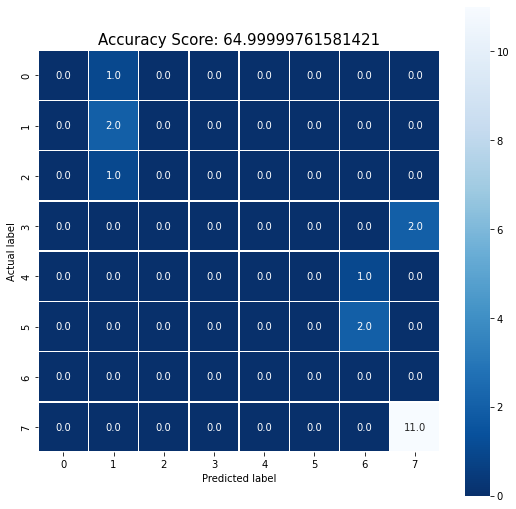

In [14]:
cnf_mt = metrics.confusion_matrix(actual, predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
precision = metrics.precision_score(actual, predicted, average='macro')*100
recall = metrics.recall_score(actual, predicted, average='macro')*100
plt.savefig('cm1_nn.png')

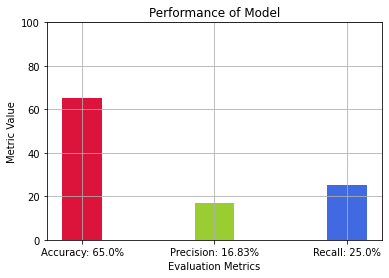

In [15]:
metric = [accuracy, precision, recall]
lables=['Accuracy: '+str(round(accuracy,2))+'%', 'Precision: '+str(round(precision,2))+'%', 'Recall: '+str(round(recall,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_nn.png')
plt.show()

#References


[1] T. Developers, TensorFlow. Zenodo, 2022.
$$$$
[2] F. Pedregosa κ.ά., ‘Scikit-learn: Machine Learning in Python’, Journal of Machine Learning Research, τ. 12, σσ. 2825–2830, 2011.